In [1]:
import numpy as np
import pandas as pd
import re,string
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
# from sklearn.ensemble import RandomForestClassifier
import pickle
import nltk
nltk.download('stopwords')
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('SMS_train.csv', encoding = 'latin1')
df = df.sample(frac = 1)
df

,S. No.,Message_body,Label
294,295,Oh yeah clearly it's my fault,Non-Spam
582,583,goldviking (29/M) is inviting you to be his fr...,Spam
230,231,You'd like that wouldn't you? Jerk!,Non-Spam
656,657,WE REGRET TO INFORM U THAT THE NHS HAS MADE A ...,Non-Spam
211,212,Hmm. Shall i bring a bottle of wine to keep us...,Non-Spam
...,...,...,...
283,284,I'm still pretty weak today .. Bad day ?,Non-Spam
786,787,Sen told that he is going to join his uncle fi...,Non-Spam
918,919,We are okay. Going to sleep now. Later,Non-Spam
158,159,Gr8. So how do you handle the victoria island ...,Non-Spam


In [3]:
#No of a categories
len(set(df['Label']))

2

In [4]:
df.groupby('Label').Label.count()

Label
Non-Spam    835
Spam        122
Name: Label, dtype: int64

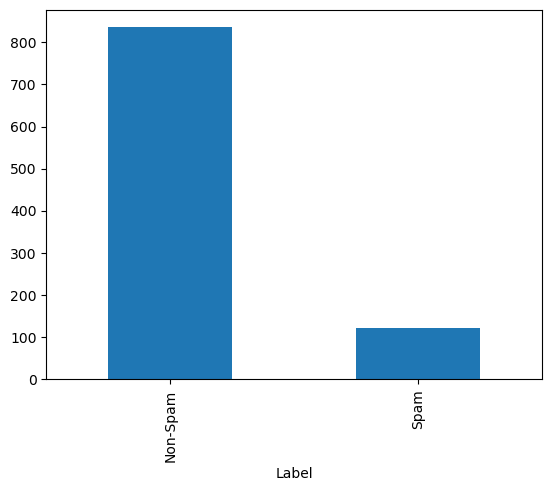

In [5]:
#Analyzing data
df.groupby('Label').Label.count().plot.bar()
plt.show()

In [6]:
# Data Cleaning using regex
regs = re.sub("[^a-zA-Z]", " ", df['Message_body'][0]).lower()
regs

'rofl  its true to its name'

In [7]:
#stop words
nltk.download('stopwords')
words = stopwords.words("english")
print(words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
# Data Cleaning using stemmer

stemmer = PorterStemmer()
data = "I am loving messageing".split()
" ".join([stemmer.stem(i) for i in data])
# stemmer.stem("")

'i am love messag'

In [9]:
words = stopwords.words("english")
without_stop_words_of_a_news = " ".join([i for i in regs.lower().split() if i not in words])
without_stop_words_of_a_news

'rofl true name'

In [10]:
df['cleaned'] = list(filter(lambda x: [i for i in re.sub("[^a-zA-Z]", " ", x)],df['Message_body']))
df['cleaned'] = df['cleaned'].apply(lambda x: " ".join([stemmer.stem(i) for i in x.lower().split()]))
df

,S. No.,Message_body,Label,cleaned
294,295,Oh yeah clearly it's my fault,Non-Spam,oh yeah clearli it' my fault
582,583,goldviking (29/M) is inviting you to be his fr...,Spam,goldvik (29/m) is invit you to be hi friend. r...
230,231,You'd like that wouldn't you? Jerk!,Non-Spam,you'd like that wouldn't you? jerk!
656,657,WE REGRET TO INFORM U THAT THE NHS HAS MADE A ...,Non-Spam,we regret to inform u that the nh ha made a mi...
211,212,Hmm. Shall i bring a bottle of wine to keep us...,Non-Spam,hmm. shall i bring a bottl of wine to keep us ...
...,...,...,...,...
283,284,I'm still pretty weak today .. Bad day ?,Non-Spam,i'm still pretti weak today .. bad day ?
786,787,Sen told that he is going to join his uncle fi...,Non-Spam,sen told that he is go to join hi uncl financ ...
918,919,We are okay. Going to sleep now. Later,Non-Spam,we are okay. go to sleep now. later
158,159,Gr8. So how do you handle the victoria island ...,Non-Spam,gr8. so how do you handl the victoria island t...


In [11]:
#cleaning dataset
nltk.download('stopwords')
stemmer = PorterStemmer()
words = stopwords.words("english")
words.extend(['a','an','the'])
df['cleaned'] = df['cleaned'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x.lower()).split() if i not in words]).lower())
# df['newcleaned'] = [(i for i in list(df['cleaned'])).split() if i not in words ]
df

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,S. No.,Message_body,Label,cleaned
294,295,Oh yeah clearly it's my fault,Non-Spam,oh yeah clearli fault
582,583,goldviking (29/M) is inviting you to be his fr...,Spam,goldvik invit hi friend repli ye see www sm ac...
230,231,You'd like that wouldn't you? Jerk!,Non-Spam,like jerk
656,657,WE REGRET TO INFORM U THAT THE NHS HAS MADE A ...,Non-Spam,regret inform u nh ha made mistak u never actu...
211,212,Hmm. Shall i bring a bottle of wine to keep us...,Non-Spam,hmm shall bring bottl wine keep us amus joke s...
...,...,...,...,...
283,284,I'm still pretty weak today .. Bad day ?,Non-Spam,still pretti weak today bad day
786,787,Sen told that he is going to join his uncle fi...,Non-Spam,sen told go join hi uncl financ cbe
918,919,We are okay. Going to sleep now. Later,Non-Spam,okay go sleep later
158,159,Gr8. So how do you handle the victoria island ...,Non-Spam,gr handl victoria island traffic plu album due


In [12]:
df.to_csv('cleaned_news.csv')

In [13]:
# Training model
from sklearn.linear_model import LogisticRegression
log_regression = LogisticRegression()

vectorizer = TfidfVectorizer(stop_words="english")
X = df['cleaned']
Y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15) #Splitting dataset

# #Creating Pipeline
pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=2000)),
                     ('clf', LogisticRegression(random_state=1))])

# from sklearn.pipeline import Pipeline
# from sklearn.svm import SVC
# pipeline = Pipeline([
#     ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
#     ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
#     ('classifier', SVC()),  # train on TF-IDF vectors w/ SVM
# ])


# #Training model
model = pipeline.fit(X_train, y_train)

# #Creating pickle file
# with open('LogisticRegression.pickle', 'wb') as f:
#     pickle.dump(model, f)

In [14]:
print(X_test,y_test)

109                            ok thk got u wan come wat
321                      u come n search tat vid finishd
179                                  watch ajith film ah
476         fri ah oki lor goin drivin den go shoppin tt
446     enufcredeit tocal shal ileav uni get bu yor hous
                             ...                        
717    either way work lt gt year old hope doesnt bother
513    doubl min doubl txt price liner latest orang b...
290    helloooo wake sweet morn welcom enjoy thi day ...
509                  geeeee internet realli bad today eh
139                                        wa pay attent
Name: cleaned, Length: 144, dtype: object 109    Non-Spam
321    Non-Spam
179    Non-Spam
476    Non-Spam
446    Non-Spam
         ...   
717    Non-Spam
513        Spam
290    Non-Spam
509    Non-Spam
139    Non-Spam
Name: Label, Length: 144, dtype: object


In [15]:
#Accuracy
from sklearn.metrics import accuracy_score
predict_news_cat = model.predict(X_test)
print(accuracy_score(y_test,predict_news_cat))
print('\n')
print(predict_news_cat)

0.9305555555555556


['Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam'
 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam'
 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam'
 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam'
 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam'
 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam'
 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam'
 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam'
 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam'
 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam'
 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam'
 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Spam' 'Non-Spam' 'Non-Spam'
 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam'
 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam'
 'Non-Spam' 'Spam' 'Non-Spam' 'Spa

In [19]:
file = open('news1.txt','r')
news = file.read()
file.close()
# news = input("Enter news = ")
news_data = {'predict_news':[news]}
news_data_df = pd.DataFrame(news_data)

predict_news_cat = model.predict(news_data_df['predict_news'])
print("Predicted news category = ",predict_news_cat[0])

Predicted news category =  Non-Spam


In [17]:
# confusion matrix and classification report(precision, recall, F1-score)
ytest = np.array(y_test)
print(classification_report(model.predict(X_test),ytest))
print(confusion_matrix(model.predict(X_test),ytest))

              precision    recall  f1-score   support

    Non-Spam       1.00      0.93      0.96       139
        Spam       0.33      1.00      0.50         5

    accuracy                           0.93       144
   macro avg       0.67      0.96      0.73       144
weighted avg       0.98      0.93      0.95       144

[[129  10]
 [  0   5]]


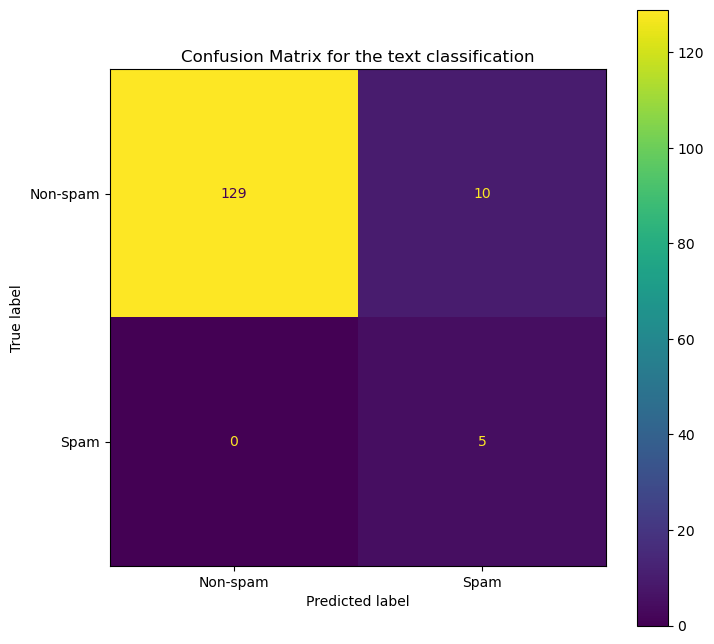

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(model.predict(X_test),ytest)
# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(8,8), dpi=100)
class_names = ['Non-spam','Spam']
# initialize using the raw 2D confusion matrix
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(cm, display_labels=class_names)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for the text classification')

# show the plot.
# Pass the parameter ax to show customizations (ex. title)
display.plot(ax=ax);